#**Introduction**

What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.

#**Description**

Several of the columns contain json. You can save a bit of time by porting the load data functions.

Even in simple fields like runtime may not be consistent across versions. For example, previous dataset shows the duration for Avatar's extended cut while TMDB shows the time for the original version.

There's now a separate file containing the full credits for both the cast and crew.

All fields are filled out by users so don't expect them to agree on keywords, genres, ratings, or the like.

Your existing kernels will continue to render normally until they are re-run.

#**Open Questions About the Data**

1. What areas have the most influence on revenue?
2. How is a movie’s revenue and average score affected by its
genre?
3. What influence does release date have on revenue?

#**Filtering and Selecting data**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Import Data

In [12]:
movies = pd.read_csv('tmdb_5000_movies.csv')
release = pd.read_csv('tmdb_5000_movies1.csv')

#Take Countries Production from data

Replace all empty Data by NaN

In [7]:
data = []
data = movies['production_countries'].replace('[]',np.nan)

Create a new Dataframe including "areas" and "revenue" which dropped NaN and 0 value

In [8]:
d = {'areas': data,'revenue':movies['revenue']}
data1=pd.DataFrame(data=d)
data1['areas']=data1['areas'].replace('[]',np.nan)
data1= data1.replace(0,np.nan)
data1 = data1.dropna()
data1.reset_index(inplace=True)

#Processing Json data in "areas" column

In [9]:
obj = []
dt=data1['areas']
import json
for i in range(len(dt)):
  # print(i)
  obj.append(json.loads(dt[i]))

In [10]:
json = []
for i in range(len(obj)):
    json.append(obj[i].pop(0))

In [11]:
json1 =[]
for i in range(len(json)):
  json1.append(json[i].get('name'))
d1 = {'Countries': json1,'Revenue':data1['revenue']}
data2=pd.DataFrame(data=d1)

##Create a new table including Countries and Revenue

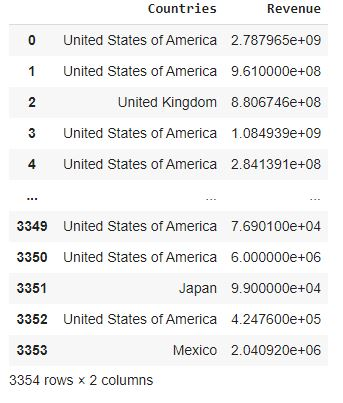

In [13]:
data3 = data2.groupby('Countries')['Revenue'].sum()

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

#Take Genres from data

In [15]:
g = {'Genres':movies['genres'].replace('[]',np.nan),'Revenue': movies['revenue'].replace(0,np.nan),'Average score':movies['vote_average'].replace()} #movies['revenue']} 
genre1=pd.DataFrame(data=g)
genre1 = genre1.dropna()
genre1 = genre1.reset_index()

In [16]:
obj1 = []
gr=genre1['Genres']
import json
for i in range(len(gr)):
  # print(i)
  obj1.append(json.loads(gr[i]))

In [17]:
jsongr = []
for i in range(len(obj1)):
    jsongr.append(obj1[i].pop(0))

In [18]:
jsongr1 =[]
for i in range(len(jsongr)):
  jsongr1.append(jsongr[i].get('name'))
g1 = {'Genres': jsongr1,'Revenue':genre1['Revenue'],'Average score':genre1['Average score']}
genre2=pd.DataFrame(data=g1)

##Create a new table including Genres, Revenue and Average score

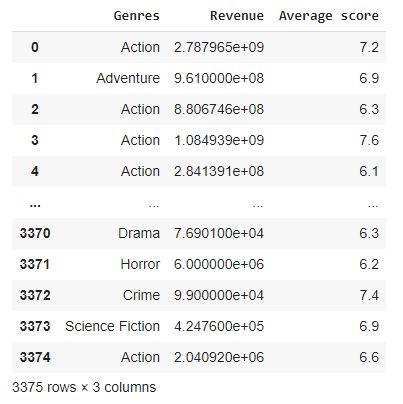

In [19]:
genre3 = genre2.groupby('Genres')['Revenue'].sum()

In [20]:
rating = genre2.groupby('Genres')['Average score'].sum()

In [21]:
r = {'Release day':movies['release_date'],'Revenue':movies['revenue']}
re = pd.DataFrame(data=r)

#**Answer the questions**

#**1.**

##I use Ttest to solve the problem

###State the null and research hypothesis

H0: Areas affect on revenue 

H1: Areas do not affect on revenue

In [23]:
from scipy import stats

In [24]:
stats.ttest_1samp(data3,82260638.65) 

Ttest_1sampResult(statistic=1.379816831984426, pvalue=0.17446079843498172)

Ttest_1sampResult(statistic=1.379816831984426, pvalue=0.17446079843498172)

pvalue > 0.05

Aceppt H0

**The area where it have the most influence on revenue is USA**

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(data3)
# plt.yticks(movies['revenue'])
plt.xticks(rotation=90)
plt.title("The total revenue of film of each production Countries")
plt.ylim(0,300000000000)
plt.xlabel("Countries")
plt.ylabel("Revenue")
plt.grid(True)
plt.show()

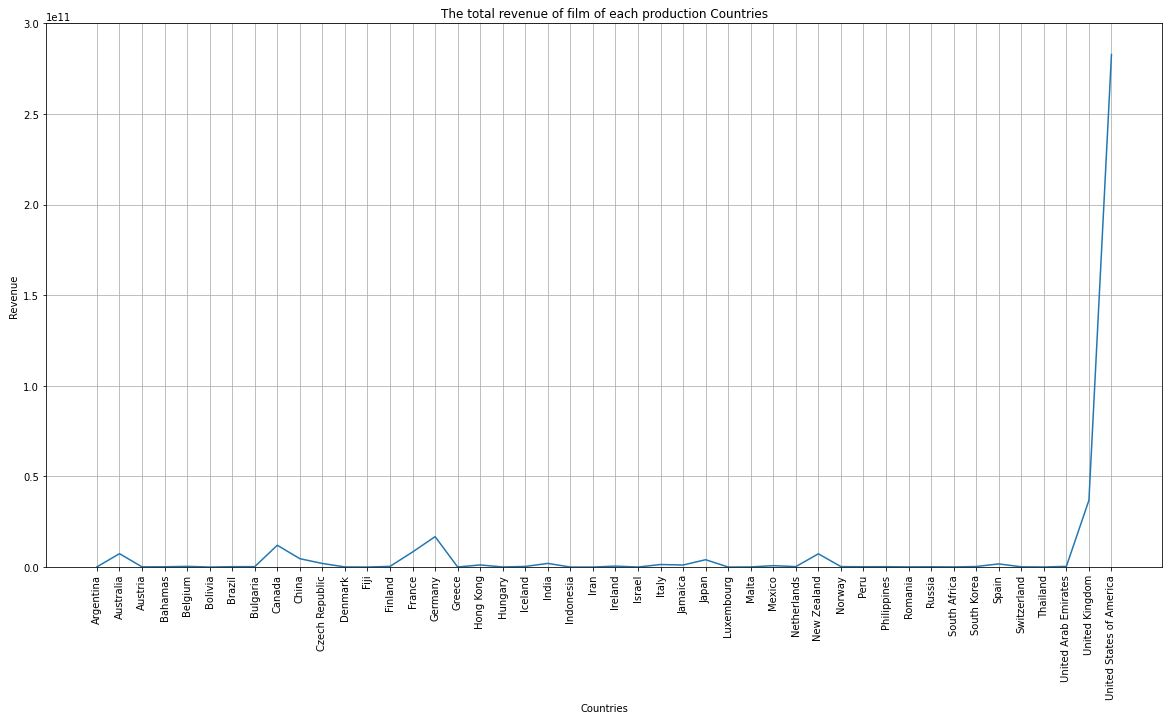

#**2.**









##I use ANOVA test to solve the problem

###State the null and research hypothesis

H0: Revenue and Average score affected by Genres

H1: H0: Revenue and Average score does not be affected by Genres

In [25]:
from scipy.stats import f_oneway

In [26]:
f_oneway(genre2['Revenue'],genre1['Average score'])

F_onewayResult(statistic=1373.6051712756203, pvalue=7.549742283657914e-274)

F_onewayResult(statistic=1373.6051712756203, pvalue=7.549742283657914e-274)

Action have the biggest revenue

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(genre3)
plt.xticks(rotation=90)
plt.title("The total revenue of film of each genre")
plt.ylim(0,100000000000)
plt.xlabel("Genres")
plt.ylabel("Revenue")
plt.grid(True)
plt.show() 

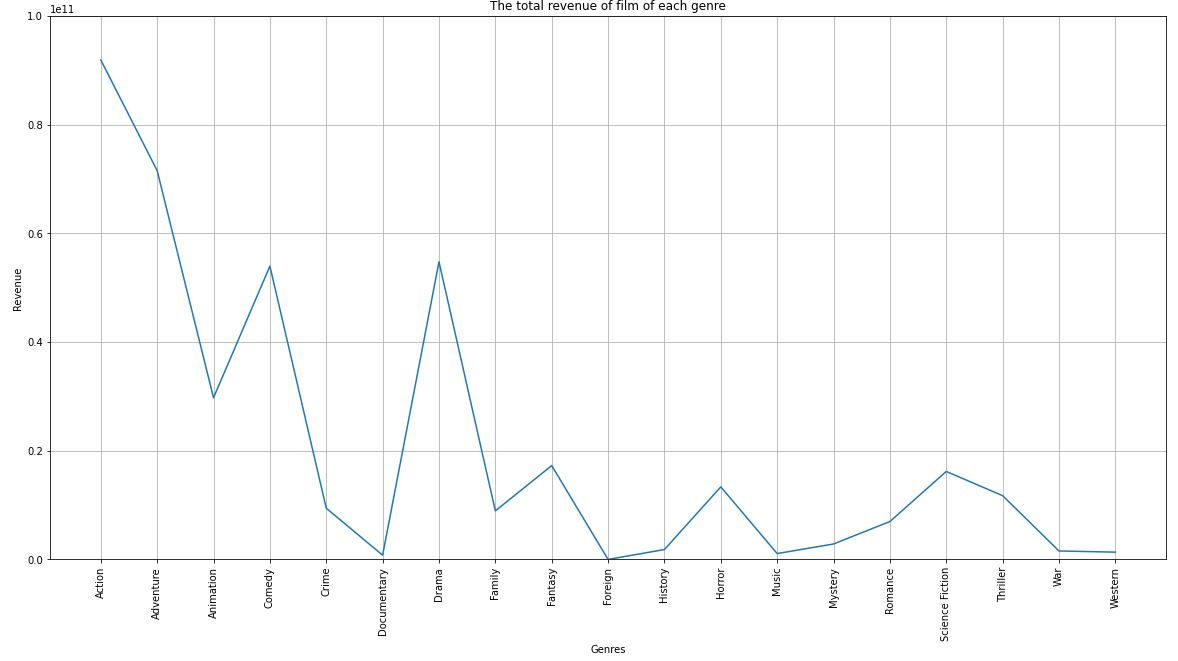

Drama have the biggest rate

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(rating)
plt.xticks(rotation=90)
plt.title("The total rating of film on each genre")
plt.ylim(0,5500)
plt.xlabel("Genres")
plt.ylabel("Rate")
plt.grid(True)
plt.show() 

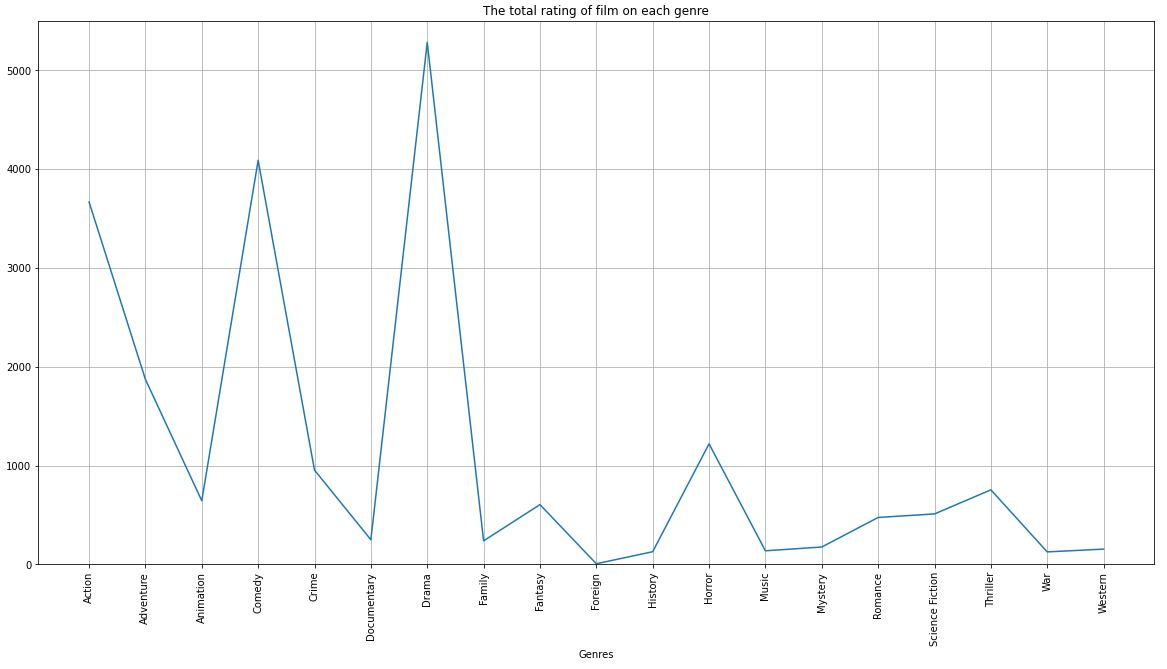

#**3.**

Collect the name of the films, release datea and revenue.

Create a new table including 3 columns: Names, Release date and Revenue

In [30]:
da = {"Names":release.title,'Release date':release.release_date,'Revenue':release.revenue.replace(0,np.nan)}
date = pd.DataFrame(data=da)

In [36]:
date = date.dropna()
date = date.reset_index()

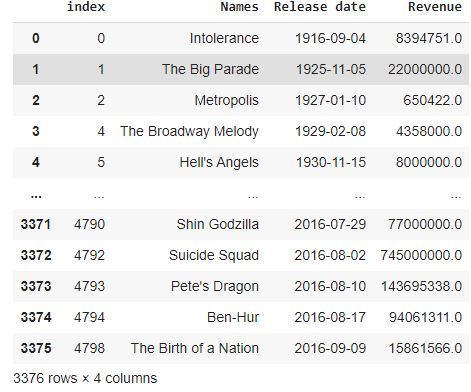

Convert "Release date" to datetime

In [38]:
date['Release date']=pd.to_datetime(date['Release date'])

Visualize Release date and Revenue

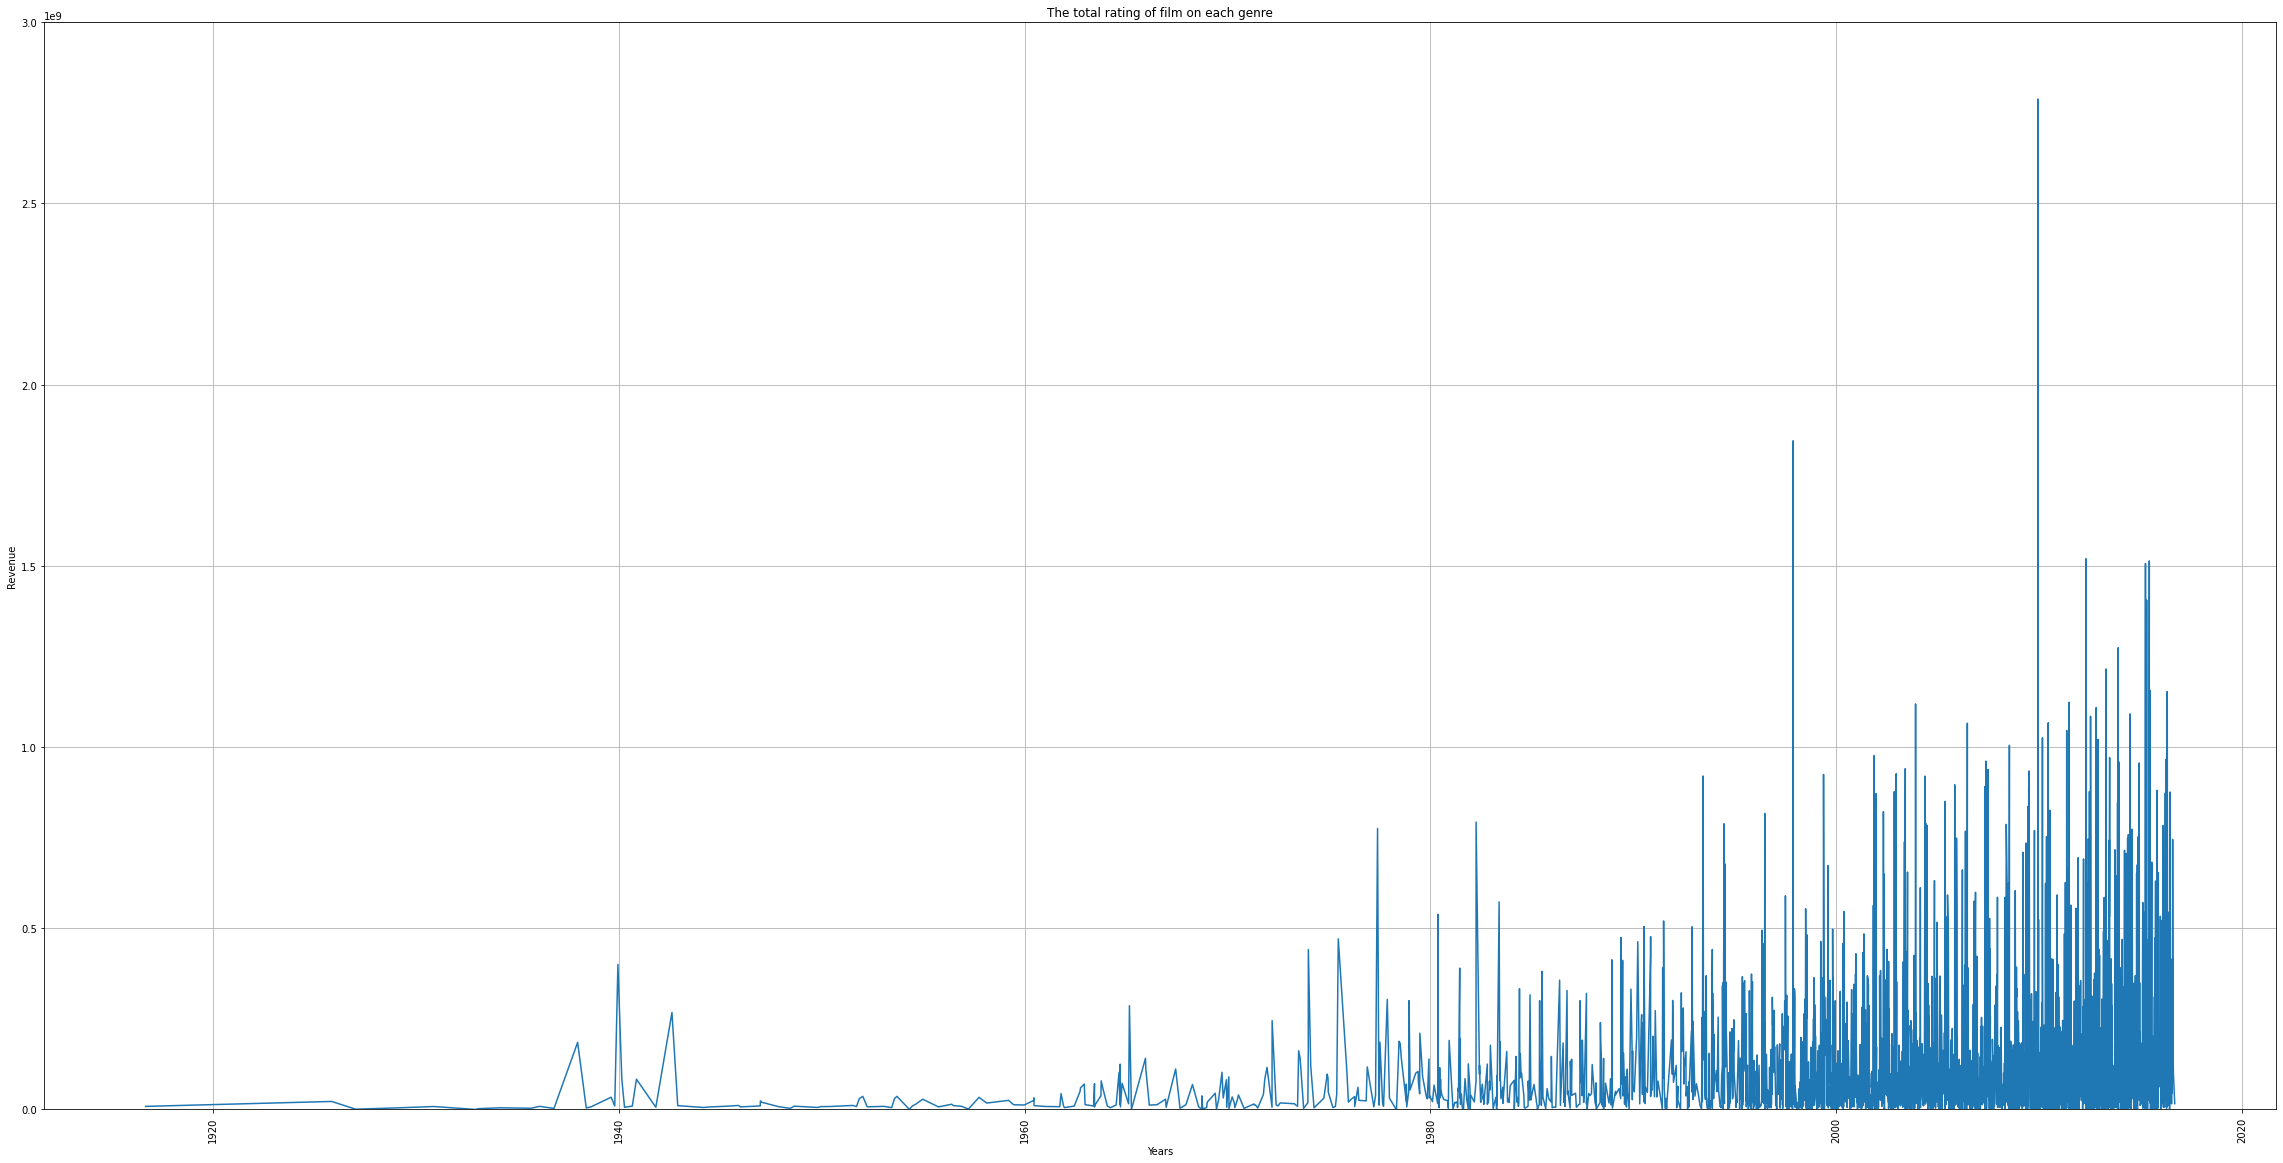

In [52]:
plt.figure(figsize=(40,20))
plt.plot(date['Release date'],date.Revenue)
plt.xticks(rotation=90)
plt.title("The total rating of film on each genre")
plt.ylim(0,3000000000)
plt.xlabel("Years")
plt.ylabel("Revenue")
plt.grid(True)
plt.show() 

From the graph, We can transparently see many films which was broadcasted in the period of time from 2000 to 2020 than the other time

The revenue does not be affected by the release date